# Correlation Analysis between Pi and Siglent Current Measurements
This notebook loads two aligned CSV files (`df_energylog.csv` and `df_siglentlog.csv`), computes the correlation between their current measurements, and visualizes the results.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# --- File paths ---
pi_file = "df_energylog.csv"
siglent_file = "df_siglentlog.csv"


In [3]:
# --- Load CSVs ---
df_pi = pd.read_csv(pi_file)
df_sig = pd.read_csv(siglent_file)

print("Pi log columns:", df_pi.columns)
print("Siglent log columns:", df_sig.columns)

df_pi.head(), df_sig.head()


Pi log columns: Index(['time_datetime', 'time', 'voltage', 'current', 'cpuload'], dtype='object')
Siglent log columns: Index(['Unnamed: 0', 'time', 'voltage', 'current', 'cpuload'], dtype='object')


(            time_datetime       time   voltage   current  cpuload
 0  0 days 00:00:55.474000  55.622500  0.779535  0.674215      0.0
 1  0 days 00:00:55.774000  55.972000  0.749271  0.619147      0.0
 2  0 days 00:00:56.074000  56.272333  0.790370  0.687610      0.0
 3  0 days 00:00:56.374000  56.572333  0.748823  0.625100      0.0
 4  0 days 00:00:56.674000  56.872333  0.791981  0.687610      0.0,
    Unnamed: 0          time  voltage  current  cpuload
 0          11  1.758017e+09        5     0.52      0.0
 1          78  1.758017e+09        5     0.51      0.0
 2          79  1.758017e+09        5     0.51      0.0
 3          80  1.758017e+09        5     0.55      0.0
 4          81  1.758017e+09        5     0.52      0.0)

In [4]:
# --- Correlation analysis ---
# Ensure equal length for fair comparison
n = min(len(df_pi), len(df_sig))
pi_curr = df_pi["current"].iloc[:n].values
sig_curr = df_sig["current"].iloc[:n].values

# Compute Pearson correlation
corr_val = pd.Series(pi_curr).corr(pd.Series(sig_curr))
print("Correlation (Pearson r):", corr_val)


Correlation (Pearson r): 0.7994367098264606


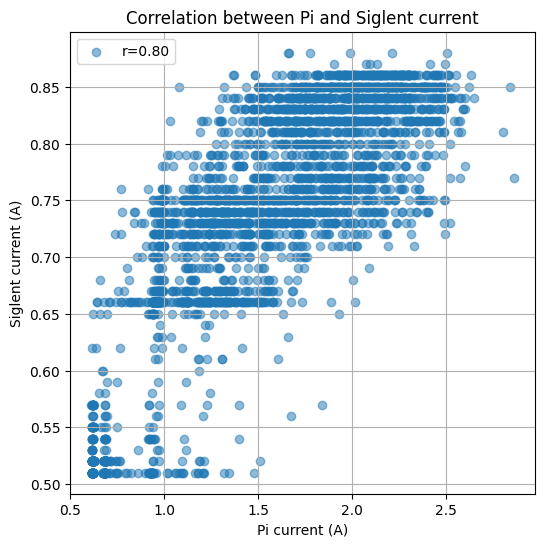

In [5]:
# --- Scatter plot ---
plt.figure(figsize=(6,6))
plt.scatter(pi_curr, sig_curr, alpha=0.5, label=f"r={corr_val:.2f}")
plt.xlabel("Pi current (A)")
plt.ylabel("Siglent current (A)")
plt.title("Correlation between Pi and Siglent current")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# --- Error statistics ---
errors = pi_curr - sig_curr
mae = np.mean(np.abs(errors))
rmse = np.sqrt(np.mean(errors**2))
mape = np.mean(np.abs(errors / sig_curr)) * 100

print(f"Mean Absolute Error (A): {mae:.4f}")
print(f"Root Mean Square Error (A): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (%): {mape:.2f}%")


Mean Absolute Error (A): 0.8236
Root Mean Square Error (A): 0.9329
Mean Absolute Percentage Error (%): 106.62%
